In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2024-01-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2024_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-01-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,14850,해운대구,7434,100.24%,"10,397"
1,2024-01-11,간장,오복왕표 0.9ℓ 1병,5980,해운대구,7500,해운대구,1520,25.42%,"6,876"
2,2024-01-11,갈치,60cm정도 500g 1마리(냉동),10394,해운대구,15000,해운대구,4606,44.31%,"12,134"
3,2024-01-11,고등어,30㎝정도 500g 1마리,4878,해운대구,6005,해운대구,1127,23.1%,"5,445"
4,2024-01-11,달걀,오경슈퍼란60g정도 10개,3990,해운대구,4280,해운대구,290,7.27%,"4,157"
5,2024-01-11,닭고기,육계 1.0㎏,4980,해운대구,10600,해운대구,5620,112.85%,"8,522"
6,2024-01-11,대파,1.0㎏,3047,해운대구,6935,해운대구,3888,127.6%,"4,972"
7,2024-01-11,돼지고기,삼겹살 500g,8900,해운대구,13450,해운대구,4550,51.12%,"10,917"
8,2024-01-11,두부,500g 판두부(국산포장두부 420g) 1모,3486,해운대구,6067,해운대구,2581,74.04%,"4,463"
9,2024-01-11,라면,신라면 120g 1봉지,780,해운대구,780,해운대구,0,0.0%,780


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2024-04-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2024_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-04-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7416,해운대구,17250,해운대구,9834,132.61%,"11,197"
1,2024-04-11,간장,오복왕표 0.9ℓ 1병,7358,해운대구,7980,해운대구,622,8.45%,"7,613"
2,2024-04-11,갈치,60cm정도 500g 1마리(냉동),9750,해운대구,12190,해운대구,2440,25.03%,"11,123"
3,2024-04-11,고등어,30㎝정도 500g 1마리,5000,해운대구,8750,해운대구,3750,75.0%,"6,630"
4,2024-04-11,달걀,오경슈퍼란60g정도 10개,3990,해운대구,4380,해운대구,390,9.77%,"4,190"
5,2024-04-11,닭고기,육계 1.0㎏,6500,해운대구,9975,해운대구,3475,53.46%,"8,322"
6,2024-04-11,대파,1.0㎏,2167,해운대구,4865,해운대구,2698,124.5%,"3,776"
7,2024-04-11,돼지고기,삼겹살 500g,10300,해운대구,19450,해운대구,9150,88.83%,"13,550"
8,2024-04-11,두부,500g 판두부(국산포장두부 420g) 1모,3835,해운대구,6067,해운대구,2232,58.2%,"4,695"
9,2024-04-11,라면,신라면 120g 1봉지,780,해운대구,780,해운대구,0,0.0%,780


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2024-07-11"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2024_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-07-11,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6583,해운대구,17250,해운대구,10667,162.04%,"11,169"
1,2024-07-11,간장,오복왕표 0.9ℓ 1병,7147,해운대구,7980,해운대구,833,11.66%,"7,542"
2,2024-07-11,갈치,60cm정도 500g 1마리(냉동),5645,해운대구,12749,해운대구,7104,125.85%,"10,084"
3,2024-07-11,고등어,30㎝정도 500g 1마리,3251,해운대구,5555,해운대구,2304,70.87%,"4,585"
4,2024-07-11,달걀,오경슈퍼란60g정도 10개,3990,해운대구,4380,해운대구,390,9.77%,"4,190"
5,2024-07-11,닭고기,육계 1.0㎏,5400,해운대구,9350,해운대구,3950,73.15%,"7,913"
6,2024-07-11,대파,1.0㎏,2638,해운대구,3504,해운대구,866,32.83%,"3,008"
7,2024-07-11,돼지고기,삼겹살 500g,13400,해운대구,21950,해운대구,8550,63.81%,"16,750"
8,2024-07-11,두부,500g 판두부(국산포장두부 420g) 1모,3835,해운대구,6067,해운대구,2232,58.2%,"4,695"
9,2024-07-11,라면,신라면 120g 1봉지,780,해운대구,780,해운대구,0,0.0%,780


In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2024-10-17"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2024_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2024-10-17,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6192,해운대구,14850,해운대구,8658,139.83%,"10,239"
1,2024-10-17,간장,오복왕표 0.9ℓ 1병,7147,해운대구,8480,해운대구,1333,18.65%,"7,699"
2,2024-10-17,갈치,60cm정도 500g 1마리(냉동),3775,해운대구,15714,해운대구,11939,316.26%,"11,096"
3,2024-10-17,고등어,30㎝정도 500g 1마리,3256,해운대구,6627,해운대구,3371,103.53%,"5,331"
4,2024-10-17,달걀,오경슈퍼란60g정도 10개,3990,해운대구,4380,해운대구,390,9.77%,"4,120"
5,2024-10-17,닭고기,육계 1.0㎏,4960,해운대구,11237,해운대구,6277,126.55%,"8,432"
6,2024-10-17,대파,1.0㎏,3047,해운대구,4006,해운대구,959,31.47%,"3,452"
7,2024-10-17,돼지고기,삼겹살 500g,9350,해운대구,20700,해운대구,11350,121.39%,"14,817"
8,2024-10-17,두부,500g 판두부(국산포장두부 420g) 1모,3764,해운대구,6067,해운대구,2303,61.18%,"4,555"
9,2024-10-17,라면,신라면 120g 1봉지,702,해운대구,780,해운대구,78,11.11%,754


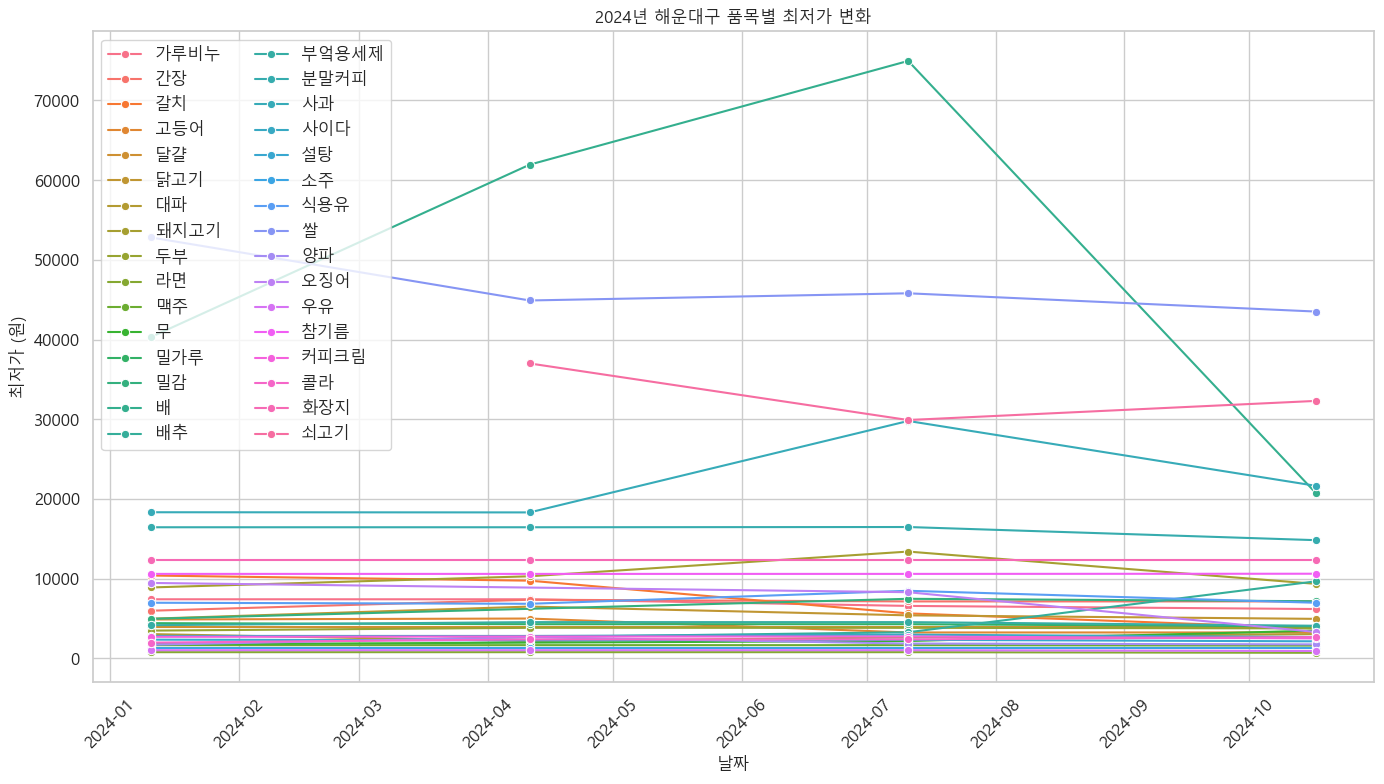

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2024_1q.csv")
q2 = pd.read_csv("해운대구2024_2q.csv")
q3 = pd.read_csv("해운대구2024_3q.csv")
q4 = pd.read_csv("해운대구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2024_min.csv", index=False, encoding="utf-8-sig")

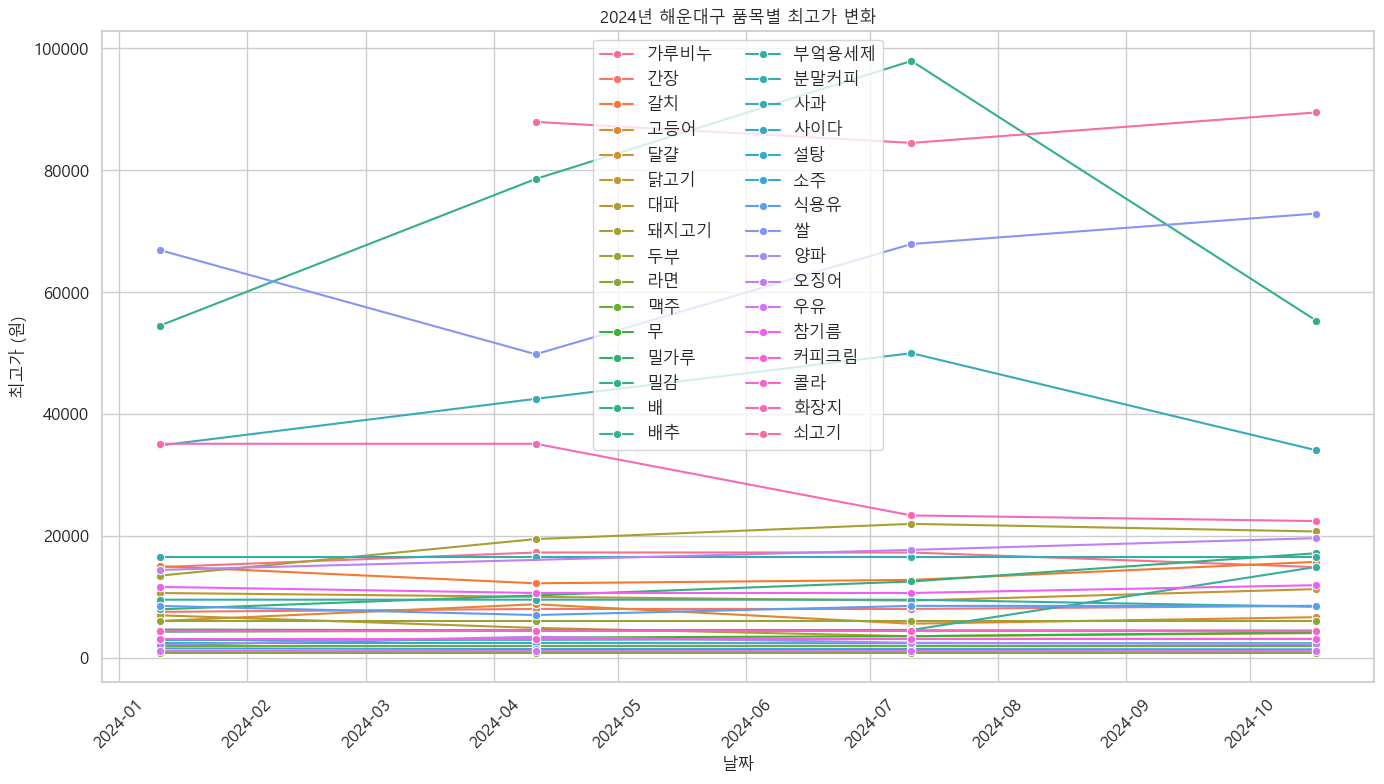

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2024_1q.csv")
q2 = pd.read_csv("해운대구2024_2q.csv")
q3 = pd.read_csv("해운대구2024_3q.csv")
q4 = pd.read_csv("해운대구2024_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2024년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2024_max.csv", index=False, encoding="utf-8-sig")